In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

# **Reading dataset**

In [3]:
img_database = np.loadtxt('/kaggle/input/fashionmnist/fashion-mnist_train.csv', delimiter=',', skiprows=1)
print(img_database.shape)
total_num_images = (img_database.shape)

(60000, 785)


In [4]:
total_num_images = (img_database.shape[0])

# **Defining Layers**

In [5]:
n_input = 784
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784

In [6]:
learning_rate = 0.1
epochs = 100
batch_size = 100

In [7]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

In [8]:
X = tf.placeholder(tf.float32, [None , n_input])
Y = tf.placeholder(tf.float32, [None , output_layer])

# **Defining Weights and biases of NN**

In [9]:
Weight_NN = {
    "W1": tf.Variable(tf.random_normal([n_input , hidden_layer_1])),
    "W2": tf.Variable(tf.random_normal([hidden_layer_1 , hidden_layer_2])),
    "W3": tf.Variable(tf.random_normal([hidden_layer_2 , hidden_layer_3])),
    "W4": tf.Variable(tf.random_normal([hidden_layer_3 , hidden_layer_4])),
    "W5": tf.Variable(tf.random_normal([hidden_layer_4 , output_layer]))
}

Bias_NN = {
    "B1": tf.Variable(tf.random_normal([hidden_layer_1])),
    "B2": tf.Variable(tf.random_normal([hidden_layer_2])),
    "B3": tf.Variable(tf.random_normal([hidden_layer_3])),
    "B4": tf.Variable(tf.random_normal([hidden_layer_4])),
    "B5": tf.Variable(tf.random_normal([output_layer]))
}

# **Computational Graph**

In [10]:
z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
z1_out = tf.nn.sigmoid(z1)

z2 = tf.add(tf.matmul(z1_out, Weight_NN["W2"]), Bias_NN["B2"])
z2_out = tf.nn.sigmoid(z2)

z3 = tf.add(tf.matmul(z2_out, Weight_NN["W3"]), Bias_NN["B3"])
z3_out = tf.nn.sigmoid(z3)

z4 = tf.add(tf.matmul(z3_out, Weight_NN["W4"]), Bias_NN["B4"])
z4_out = tf.nn.sigmoid(z4)

z5 = tf.add(tf.matmul(z4_out, Weight_NN["W5"]), Bias_NN["B5"])
NN_output = (z5)

# **Adding noise to an image**

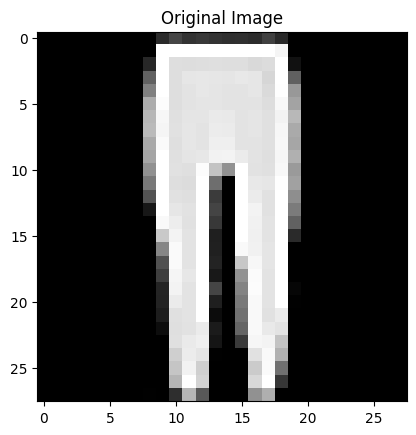

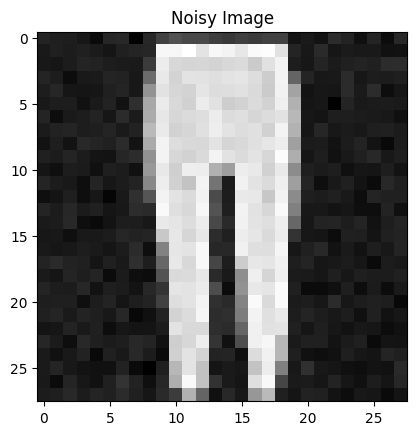

In [11]:
np.random.shuffle(img_database)
X_train = img_database[:, 1:]
X_train_noisy = X_train + 10 * np.random.normal(0, 1, size=X_train.shape)

plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.show()


plt.imshow(X_train_noisy[0].reshape(28,28), cmap = 'gray')
plt.title("Noisy Image")
plt.show()

# **Metrics**

In [12]:
computed_loss = tf.reduce_mean(tf.square(NN_output-Y))
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

init = tf.global_variables_initializer()

# **Initialization of Session**

In [13]:
sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
    for i in range(int(total_num_images/batch_size)):
        X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
        X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
        _, loss = sess.run([optimizer, computed_loss], feed_dict={X: X_noise_epoch, Y: X_epoch})
    print('Epoch', epoch, '/', epochs, 'loss:', loss)

Epoch 0 / 100 loss: 3688.1897
Epoch 1 / 100 loss: 3412.1028
Epoch 2 / 100 loss: 3149.9836
Epoch 3 / 100 loss: 3089.06
Epoch 4 / 100 loss: 2989.3933
Epoch 5 / 100 loss: 2936.0857
Epoch 6 / 100 loss: 2834.4739
Epoch 7 / 100 loss: 2697.1008
Epoch 8 / 100 loss: 2668.712
Epoch 9 / 100 loss: 2733.42
Epoch 10 / 100 loss: 2590.876
Epoch 11 / 100 loss: 2578.3064
Epoch 12 / 100 loss: 2495.2805
Epoch 13 / 100 loss: 2485.4446
Epoch 14 / 100 loss: 2451.814
Epoch 15 / 100 loss: 2484.4243
Epoch 16 / 100 loss: 2331.4062
Epoch 17 / 100 loss: 2372.7844
Epoch 18 / 100 loss: 2438.6338
Epoch 19 / 100 loss: 2294.9443
Epoch 20 / 100 loss: 2327.131
Epoch 21 / 100 loss: 2323.0295
Epoch 22 / 100 loss: 2349.9832
Epoch 23 / 100 loss: 2354.2979
Epoch 24 / 100 loss: 2326.1848
Epoch 25 / 100 loss: 2338.8955
Epoch 26 / 100 loss: 2257.432
Epoch 27 / 100 loss: 2251.7617
Epoch 28 / 100 loss: 2315.2412
Epoch 29 / 100 loss: 2231.5176
Epoch 30 / 100 loss: 2278.8162
Epoch 31 / 100 loss: 2254.7507
Epoch 32 / 100 loss: 2275.3

# **Visualizing Original, Noise added and Denoised Image**

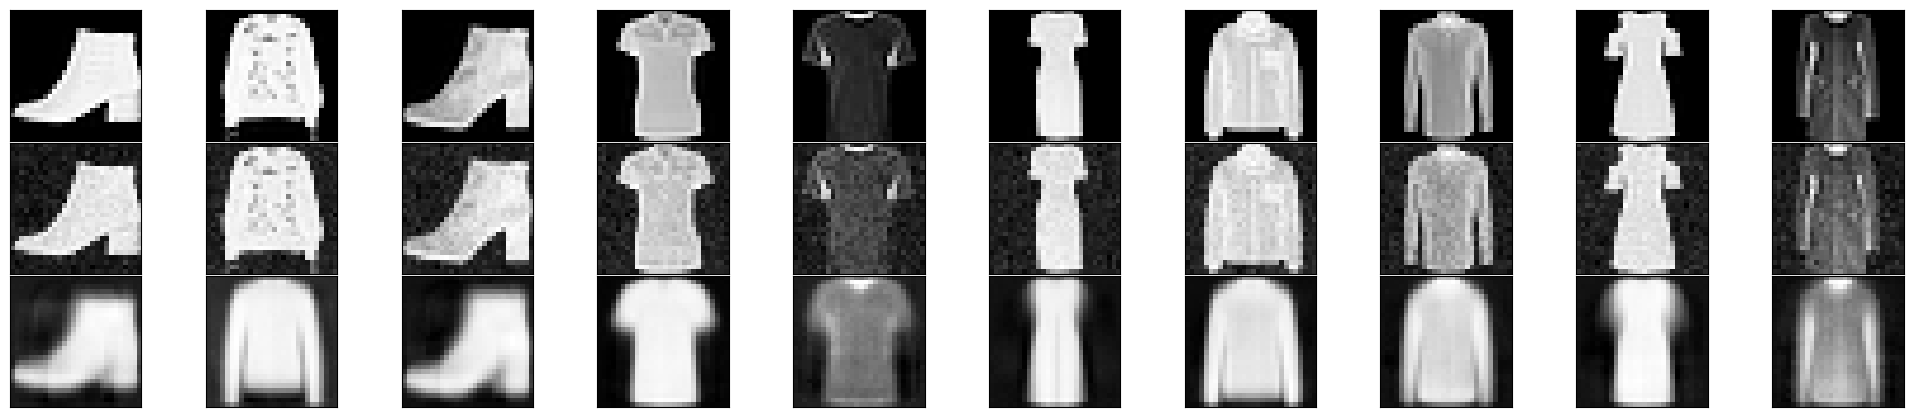

In [14]:
X_actual = X_train[20:30]
noisy_image = X_train_noisy[20:30]

denoised_image = sess.run(NN_output, feed_dict={X:noisy_image})

fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20, 4))
for images, row in zip([X_actual, noisy_image, denoised_image], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape(28,28), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1)